In [1]:
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.decomposition import PCA

In [2]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/wine.txt"
urllib.request.urlretrieve(url, 'wine.txt') 

('wine.txt', <http.client.HTTPMessage at 0x1a156f5e80>)

In [3]:
df = pd.read_csv("wine.txt", sep="\t", index_col=0)

In [4]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
from pandas import plotting

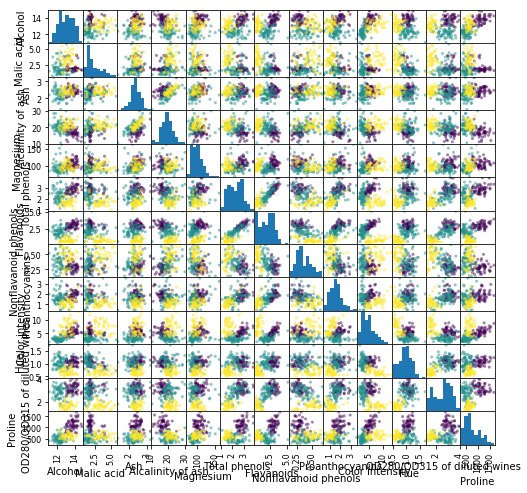

In [6]:
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8,8), c=list(df.iloc[:, 0]))
plt.show()

In [7]:
# 行列の標準化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [8]:
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [9]:
pca = PCA()
feature = pca.fit(dfs)

In [10]:
feature = pca.transform(dfs)

In [11]:
feature[0]

array([ 3.30742097, -1.43940225, -0.16527283, -0.21502463,  0.69109335,
       -0.22325037,  0.59474883,  0.06495586,  0.63963836,  1.01808396,
       -0.45029317,  0.53928914, -0.06605231])

In [12]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,-0.223250,0.594749,0.064956,0.639638,1.018084,-0.450293,0.539289,-0.066052
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,-0.924512,0.053624,1.021534,-0.307978,0.159252,-0.142256,0.387146,0.003626
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0.547731,0.423012,-0.343248,-1.174521,0.113042,-0.285866,0.000582,0.021655
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0.114109,-0.382259,0.641783,0.052397,0.238739,0.757448,-0.241339,-0.368444
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,-0.405376,0.442825,0.415528,0.325900,-0.078146,-0.524466,-0.216055,-0.079140


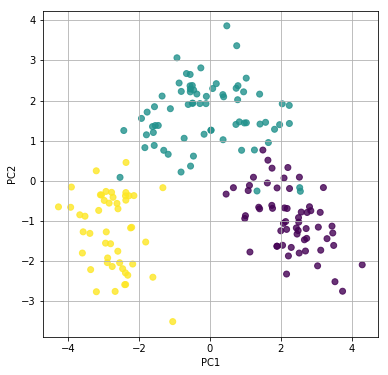

In [13]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [14]:
dfs = dfs[['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']]

In [15]:
# 勉強のために成分数を減らして分析
dfs.head()

,Color intensity,Flavanoids,Alcohol,Proline
0,0.251009,1.031908,1.514341,1.010159
1,-0.292496,0.731565,0.245597,0.962526
2,0.268263,1.212114,0.196325,1.391224
3,1.182732,1.462399,1.686791,2.328007
4,-0.318377,0.661485,0.294868,-0.037767


In [16]:
feature = pca.fit(dfs)
feature = pca.transform(dfs)

In [17]:
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len((dfs.columns)))]).head()

,PC1,PC2,PC3,PC4
0,1.961585,-0.545627,-0.197206,0.507026
1,0.844371,-0.875875,-0.203594,-0.293168
2,1.457648,-0.966836,0.294984,-0.607212
3,3.377947,-0.513604,0.111948,-0.339856
4,0.240919,-0.624128,0.070921,0.417963


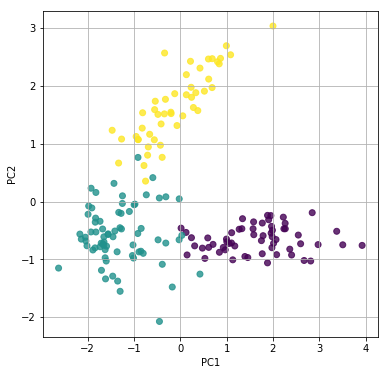

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [19]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.533531
PC2,0.309520
PC3,0.084787
PC4,0.072162


In [20]:
dfc = dfs.corr()

In [21]:
dfc

,Color intensity,Flavanoids,Alcohol,Proline
Color intensity,1.000000,-0.172379,0.546364,0.316100
Flavanoids,-0.172379,1.000000,0.236815,0.494193
Alcohol,0.546364,0.236815,1.000000,0.643720
Proline,0.316100,0.494193,0.643720,1.000000


In [22]:
# 固有値と固有ベクトル
eig_val, eig_vec =np.linalg.eig(dfc)

In [23]:
# 固有値
eig_val

array([2.13412212, 1.23808176, 0.33914837, 0.28864774])

In [27]:
# 固有ベクトル
eig_vec_pc1 = eig_vec[:, 0]

In [28]:
eig_vec

array([[-0.40941602,  0.63393186, -0.63654682,  0.15911338],
       [-0.32554699, -0.72535703, -0.56689587, -0.21565114],
       [-0.60560142,  0.16828625,  0.38871536, -0.67366685],
       [-0.59970376, -0.20896726,  0.34976791,  0.68873107]])

In [29]:
# 主成分得点(PC1)
pc1 = np.dot(dfs, eig_vec_pc1)

In [30]:
# 相関行列の固有値の第1成分を、主成分分析では「第1主成分(PC1)の固有値」と言います
eig_val_pc1 = eig_val[0]

In [32]:
eig_vec_pc1

array([-0.40941602, -0.32554699, -0.60560142, -0.59970376])